## Chapter1. 한 눈에 보는 머신러닝 ##

### 1.1 머신러닝이란? ###    
머신러닝 = 명시적인 프로그래밍 없이 컴퓨터가 학습하는 능력을 갖추게 하는 연구 분야

### 1.2 왜 머신러닝을 사용하는가? ###

<전통적인 프로그래밍 방식>
1. 문제연구: 문제에 대한 해결책을 찾고자 연구 
2. 규칙작성: 결정된 규칙을 소프트웨어로 만듦
3. 평가 후 론칭 -> 문제 발생 시 오차분석 후 반복
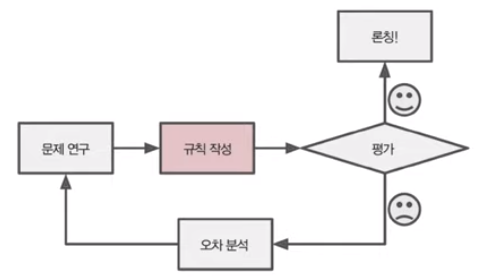


<머신러닝>
* 전통적인 프로그래밍 방식과의 차이점  
  : 머신러닝 알고리즘 훈련 -> 사람이 명시적으로 만드는 것이 아니라 데이터의 규칙, 특징을 스스로 찾아냄   
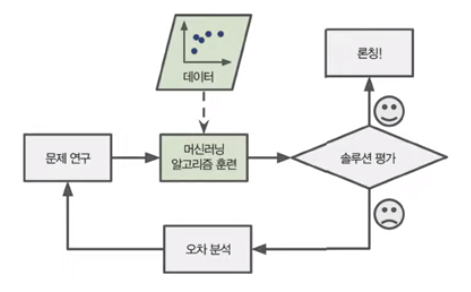

<머신러닝 작업흐름>  
= 파이프라인(+Devops, MLops)
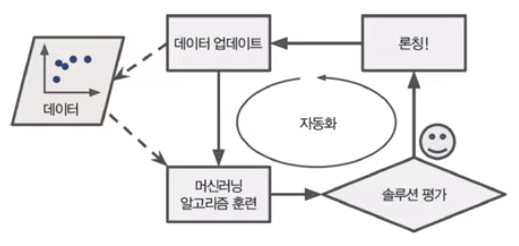


### 1.3 대표적인 머신러닝 애플리케이션 ###

* 제품 이미지를 보고 자동으로 분류하기 -> CNN
* 자동으로 뉴스 기사를 분류하기 -> NLP(RNN,CNN,트랜스포머 등을 이용)
* 내년도 회사의 수익을 예측하기 -> 회귀
* 음성을 듣고 이해하는 애배을 만들기 -> RNN,CNN
* 구매 이력을 기반으로 고객을 나누기 -> 군집

### 1.4 머신러닝 시스템의 종류 ###

 **1) 알고리즘의 종류**  
* 지도학습 : 정답(타깃)이 있는 경우    

지도학습| 종류
-------|-------------------------
회귀 | 선형회귀, 로지스틱 회귀
분류 | 서포트 벡터 머신, 결정 트리와 앙상블, 신경망


* 비지도 학습 : 정답이 없는 경우(예측X)  

비지도 학습| 종류
---------|------------------------
군집(차원축소) | k-평균, DBSCAN, PCA, 가우시안 혼합
시각화 | -
자기지도학습 | 오토인코더

* 준지도학습 : 정답이 일부만 있는 경우 -> 지도학습과 비지도학습 혼합해서 사용  
* 강화학습 : 정한 환경 내에서 행동을 할 경우 보상 -> 보상이 최대가 되도록 함

**2) 훈련하는 시점**  
* 온라인 학습 : 적은 데이터를 이용하여 점진적으로 훈련  
* 배치 학습 : 전체 데이터 사용

**3) 모델 사용 여부**  
* 사례기반 학습 : 샘플을 기억하는 것이 훈련 -> 샘플 사이의 유사도를 이용하여 예측  
* 모델기반 학습 : 샘플을 사용한 모델을 훈련 -> 모델을 이용하여 예측


### 1.5 모델 기반 학습 ###  
선형 모델 - IMF의 1인당 GDP에 따른 OECD의 삶의 만족도

In [5]:
import sys 
assert sys.version_info >= (3,5) #python 3.5 이상 권장

In [6]:
import sklearn
assert sklearn.__version__>="0.20" #Scikit-Learn 0.2 이상 권장

In [20]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"] # 변수 INEQUALITY가 TOT인 경우
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value") #Pivot method; dataframe설정
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True) #열이름 변경
    gdp_per_capita.set_index("Country", inplace=True) # index를 Country로 설정
                                                       #inplace=True:변수 직접 변경하겠다
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35] #해당 행 제거
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [6]:
import os
datapath = os.path.join("datasets", "lifesat","") # 경로 설정

In [10]:
#주피터 그래프 깔끔하게 그리기(노트북 안에 그래프)
%matplotlib inline 
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [11]:
# 데이터 다운로드
import urllib.request
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/rickiepark/handson-ml2/master/"
os.makedirs(datapath, exist_ok=True)
for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    print("Downloading", filename)
    url = DOWNLOAD_ROOT + "datasets/lifesat/" + filename
    urllib.request.urlretrieve(url, datapath + filename)

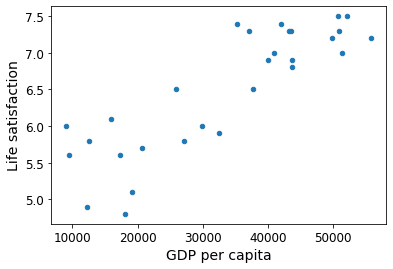

[[5.96242338]]


In [21]:
# 예제 코드
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model #선형모델 사용

# 데이터 가져오기
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

# 데이터 준비 (특성, 타깃)
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita) #사용자 정의 함수
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]] #c함수; 행으로 연결해줌 
                                              #ex) [1,2,3],[4,5,6] -> [[1,4],[2,5],[3,6]]
                                              #ex) [1,2,3] -> [[1],[2],[3]]; 일차원 배열로 간주
#country_stats["GDP per capita"].to_numpy().reshape(-1,1) : 첫번째 행과 관계없이 열 하나로 데이터 정렬

# 데이터 시각화
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction') #panda->plot
plt.show()

# 선형 모델 선택
model = sklearn.linear_model.LinearRegression()

# 모델 훈련(fit method)
model.fit(X, y)

# 키프로스에 대한 예측(새로운 데이터에 대한 예측, 추론)
X_new = [[22587]]  # 키프로스의 1인당 GDP
print(model.predict(X_new)) # 예측값 [[ 5.96242338]]

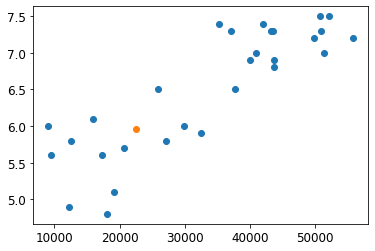

In [23]:
plt.scatter(X, y)
plt.scatter(22587, 5.96)
plt.show() #예측값이 선형모델을 따른 것을 알 수 있다

### 1.6 머신러닝의 주요 도전 과제 ###

1. 충분하지 않은 양의 훈련 데이터  
=> 충분하다면 알고리즘의 성능을 높일 수 있다.

2. 대표성 없는 훈련 데이터  
=> 샘플링 잡음 : 우연에 의한 데이터  
=> 샘플링 편향 : 표본 추출 방법이 잘못된 데이터

3. 낮은 품질의 데이터  
=> 이상치 샘플, 특성이 누락된 경우 등

4. 관련 없는 특성  
=> 특성 선택: 유용한 특성을 찾아야 함  
=> 특성 추출: 특성을 조합하여 새로운 특성을 만듦

5. 과대 적합  
=> 훈련 세트에 너무 잘 맞아 일반화 성능이 낮은 경우 - 규제필요

6. 과소 적합  
=> 모델이 너무 단순해서 훈련 세트 학습하지 못하는 경우  
=> 모델 파라미터가 더 많은 모델 사용, 특성 공학, 규제의 강도를 낮추는 등의 노력



*용어  
하이퍼파라미터 : 알고리즘 조절 위해 사전에 정의  
=> 훈련세트에 대한 검증; validation data를 이용하여 검증